# Washington Double Star Catalogue Data Reduction

Imports a csv with "WDS" columns and constrains the data to physical constraint likelihood using proper motion and parallax. This assumes that magnitude and separation deltas have already been constrained.

In [7]:
#imports 

from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u
import pandas as pd
import numpy as np
import re

In [2]:
#load and read csv

file_path = "all-sky-constrained.csv"
df = pd.read_csv(file_path) # create a dataframe in pandas

In astrometry, the proper motion of a star is its apparent angular motion across the sky, measured in milliarcseconds per year (mas/yr). Proper motion has two orthogonal components: Right Ascension (RA; α) and Declination (dec; δ). These components describe how the star moves east-west and north-south, respectively, on the celestial sphere.

The magnitude of the total proper motion is given by the Euclidean norm:

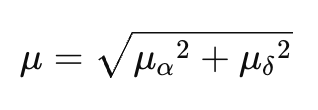

With this information we can also calculate the relative PM (rPM), a dimensionless ratio that compares the vector difference in motion to the total motion of the primary star, which quantifies the difference in their motions:

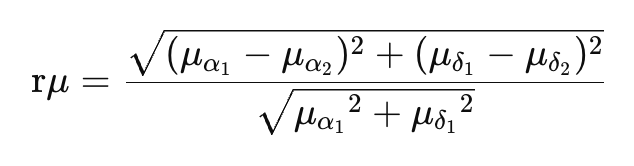

An rPM value that is less than three (3) suggests that the double stars are co-moving and could be gravitationally bound.

In [9]:
# methods of proper motion

def calculate_proper_motion(ra, dec):
    if pd.isna(ra) or pd.isna(dec):
        return null
    else:
        return np.sqrt(ra**2 + dec**2)

def calculate_relative_pm(pm1_ra, pm1_dec, pm2_ra, pm2_dec):
    numerator = np.sqrt((pm1_ra - pm2_ra)**2 + (pm1_dec - pm2_dec)**2)
    denominator = np.sqrt(pm1_ra**2 + pm1_dec**2)

    if denominator == 0:
        return null
    else:
        return numerator/denominator

In [11]:
# loop through table and make a candidates csv

candidate_rows = []

for _, row in df.iterrows():
    """
    Calculates the PM and rPM from WDS.
    """
    row["pm1"] = calculate_proper_motion(row["pm1_ra"], row["pm1_dec"])
    row["pm2"] = calculate_proper_motion(row["pm2_ra"], row["pm2_dec"])
    row["rPM"] = calculate_relative_pm(row["pm1_ra"], row["pm1_dec"], row["pm2_ra"], row["pm2_dec"])
    # candidate_rows.append(row)

candidates_df = pd.DataFrame(candidate_rows)
candidates_df.to_csv("constrained-candidates.csv", index=False)

wds_id                       00002-2519
discov#                         COO 273
comp                                NaN
first                              1910
last                               2023
obs                                  15
pa_first                             10
pa_last                              11
sep_first                           9.0
sep_last                            8.4
mag1                              10.13
mag2                               10.2
spectr                                G
pm1_ra                              1.0
pm1_dec                            -8.0
pm2_ra                              1.0
pm2_dec                           -12.0
notes                                 S
coord_arcsec_2000    000009.71-251929.3
pm1                            8.062258
pm2                           12.041595
Name: 0, dtype: object
wds_id                       00003-0257
discov#                           DVG 8
comp                                NaN
first            